# SVM Regression

In SVRs the idea is reversed to SVCs. Instead of trying to find the largest street that seperates both classes equally while minimizing margin voilations, in SVR's the objective to to find the largest street that includes any many instances of the data while minimizing margin violations. And we define a margin violation for SVCs and SVRs as inside the street, and outside the street respectively.

**To Illustrate**

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mltoolbox.data.random import noisy_func

m = 50
X, y = noisy_func(lambda x: (4 + 3 * x + np.random.randn(m, 1).ravel()), 
                  xrange=2 * np.random.rand(m, 1).ravel(), quantity=50, noise=0)

In [50]:
from sklearn.svm import LinearSVR

# train 2 models
X = X.reshape(-1, 1)
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    # predict the act data it was trained on, this is so we can ultimately reference
    # the same data point identify it as out of margin or not
    y_pred = svm_reg.predict(X)
    # np.abs(y - y_pred) measures the actual distance from the truth
    # if this value exceeds the define epsilon, then its out of bounds
    # the result of off_margin is a boolean vector == len(X) == len(y)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    # np.argwhere return the indices where a boolean vector is true
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

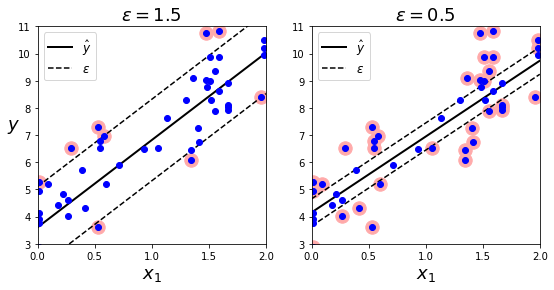

In [51]:
def plot_svm_regression(svm_reg, X, y, axes):
    # make the actual predictions from the model
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    
    # plot the streets, as defined epsilon
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--", label=r'$\epsilon$')
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    
    # plot the support vectors (margin violators)
    # this was defined by ourselves earlier using 0 or 1 indexing
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    
    # plot the data itself
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=12)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(fr"$\epsilon = {svm_reg1.epsilon}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(fr"$\epsilon = {svm_reg2.epsilon}$", fontsize=18)
plt.show()

As we can see, a larger epsilon naturally get fewer margin violations where a smaller epsilon has more. This kind of model is refered to as $\epsilon$_-insensative_, because adding more training data within the $\hat{y} \pm \epsilon$ will not actually change the model. In contrast adding data outside this margin of error will actually change the model.

## The Kernal Trick

Just like with SCV, SVR supports the kernal trick. See ![nonlinear-svc-chapter](nonlinear-svc-chapter) for an introduction to this topic.

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

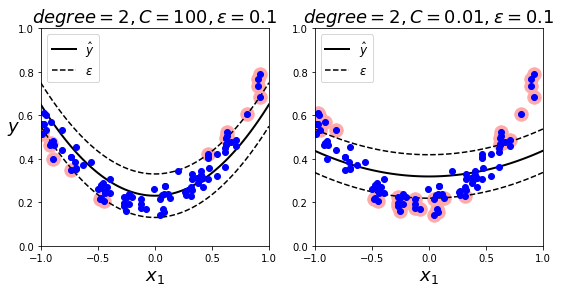

In [63]:
from sklearn.svm import SVR


m = 100
X, y = noisy_func(lambda x: 0.2 + 0.1 * x + 0.5 * x**2, 
                  xrange=(2 * np.random.rand(m, 1) - 1).ravel(), quantity=m, noise=.05)
X = X.reshape(-1, 1)

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)


plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(fr"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon = {svm_poly_reg1.epsilon}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(fr"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon = {svm_poly_reg2.epsilon}$", fontsize=18)

Decreasing C for the kernal based SVR regularizes the model and avoids overfitting.